## Observations and Insights 

### Three observations are:

* one
* two
* three


In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#read in mouse data and study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

#combine mouse and study data into one dataframe
mouse_study_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'outer')

#preview combined frame
mouse_study_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
#checking the number of mice
mouse_count = len(mouse_study_data['Mouse ID'].unique())
mouse_count

249

In [3]:
#determining duplicate mouse id
mouse_study_data['Mouse ID'].value_counts()


g989    13
y478    10
t724    10
r811    10
g570    10
        ..
x336     1
n482     1
f932     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
#obtaining duplicate mouse id data
duplicate_id = mouse_study_data.loc[mouse_study_data['Mouse ID'] == 'g989',:]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#creating clean dataframe by dropping duplicate mouse id
mouse_study_clean = mouse_study_data.loc[mouse_study_data['Mouse ID'] != 'g989',:]

In [6]:
#confirming number of mice in clean dataframe
mouse_count = len(mouse_study_clean['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [7]:
#create object of study data by drug administered
study_grouped_drug = mouse_study_clean.groupby('Drug Regimen')

#create series of statistics describing tumor volume
drug_means = study_grouped_drug['Tumor Volume (mm3)'].mean()
drug_medians = study_grouped_drug['Tumor Volume (mm3)'].median()
drug_variance = study_grouped_drug['Tumor Volume (mm3)'].var()
drug_stdev = study_grouped_drug['Tumor Volume (mm3)'].std()
drug_sem = study_grouped_drug['Tumor Volume (mm3)'].sem()

#create summary dataframe
drug_stats = pd.DataFrame(
    {'Mean': drug_means,
    'Median': drug_medians,
    'Variance': drug_variance,
    'Standard Deviation': drug_stdev,
    'Standard Error': drug_sem})

#print summary
drug_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#create summary dataframe from original data using aggregation
study_stats = mouse_study_clean['Tumor Volume (mm3)'].groupby(mouse_study_clean['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])

#print summary
study_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

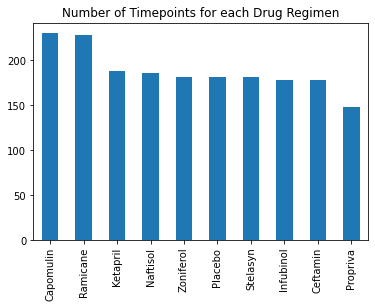

In [9]:
#generate bar plot showing total number of timepoints for each drug regimen, using Pandas
mouse_study_clean['Drug Regimen'].value_counts().plot(kind = 'bar', title = 'Number of Timepoints for each Drug Regimen')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

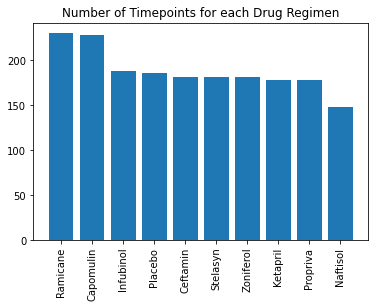

In [10]:
#generate bar plot showing total number of timepoints for each drug regimen, using pyplot
regimen = mouse_study_clean['Drug Regimen'].unique()
regimen_counts = mouse_study_clean['Drug Regimen'].value_counts()

x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_counts)
plt.xticks(tick_locations, regimen, rotation = 'vertical')
plt.title('Number of Timepoints for each Drug Regimen')
plt.show

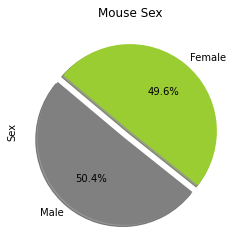

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_clean[['Mouse ID', 'Sex']].drop_duplicates(['Mouse ID'])
labels = mouse_sex['Sex'].unique()
pie_sex = mouse_sex['Sex'].value_counts()

colors = ["grey","yellowgreen"]
explode = (0.1,0)

pie_sex.plot(kind = 'pie', title = 'Mouse Sex', explode=explode, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

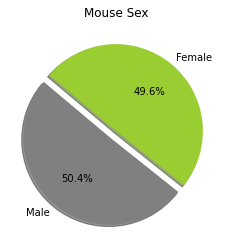

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_study_clean[['Mouse ID', 'Sex']].drop_duplicates(['Mouse ID'])
pies = mouse_sex['Sex'].unique()
pie_counts = mouse_sex['Sex'].value_counts()

colors = ["grey","yellowgreen"]
explode = (0.1,0)

plt.pie(pie_counts, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Mouse Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#get the last (greatest) timepoint for each mouse
regimen_index = mouse_study_clean.set_index('Drug Regimen')
mouse_maxtime = regimen_index.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()

#merge this group df with the original dataframe
box_regimens_maxtime = pd.merge(mouse_maxtime, mouse_study_clean, how = 'left', on = ['Mouse ID', 'Timepoint'])
box_regimens_maxtime.head(500)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
#regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_data = {'Capomulin' : [], 'Ramicane': [], 'Infubinol' : [], 'Ceftamin' : []}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 


for drug in volume_data:
    drug_data = box_regimens_maxtime.loc[box_regimens_maxtime['Drug Regimen'] == drug,:]
    volume_data[f'{drug}'] = drug_data['Tumor Volume (mm3)']
    
    quartiles = volume_data[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round((lowerq - (1.5*iqr)), 2)
    upper_bound = round((upperq + (1.5*iqr)), 2)

    outliers = []

    for v in drug_data['Tumor Volume (mm3)']:
        if v < lower_bound or v > upper_bound:
            outliers.append(round(v, 2))
    
    if not outliers:
        print(f"For {drug}, tumor volumes below {lower_bound} or above {upper_bound} would be outliers. There are none in this sample.")
    else:
        print(f"For {drug}, tumor volumes below {lower_bound} or above {upper_bound} are outliers. Qualifying value(s): {outliers}")

For Capomulin, tumor volumes below 20.7 or above 51.83 would be outliers. There are none in this sample.
For Ramicane, tumor volumes below 17.91 or above 54.31 would be outliers. There are none in this sample.
For Infubinol, tumor volumes below 36.83 or above 82.74 are outliers. Qualifying value(s): [36.32]
For Ceftamin, tumor volumes below 25.36 or above 87.67 would be outliers. There are none in this sample.


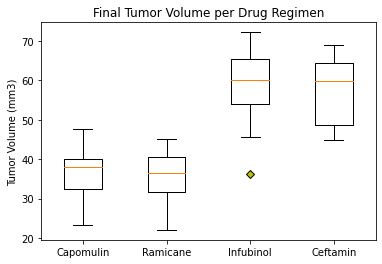

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
yellow_diamond = dict(markerfacecolor = 'y', marker = 'D')
plt.boxplot(volume_data.values(), labels = volume_data, flierprops = yellow_diamond)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume per Drug Regimen')
plt.show()

## Line and Scatter Plots

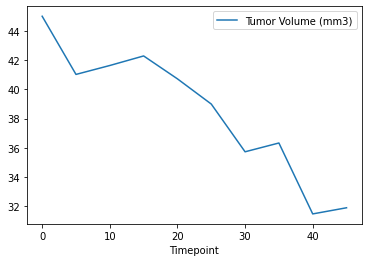

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selected_mouse = mouse_study_clean.loc[mouse_study_clean['Mouse ID'] == 'y793',['Timepoint','Tumor Volume (mm3)']]
selected_mouse.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', kind = 'line')
#plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'])
#plt.show

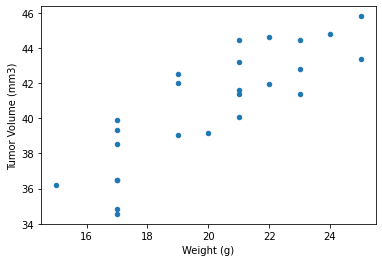

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_regimen = regimen_index.loc[['Capomulin'],['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby('Mouse ID').mean()
scatter_regimen.plot(x = 'Weight (g)', y = 'Tumor Volume (mm3)', kind = 'scatter')

## Correlation and Regression

The correlation between weight and average tumor volume is 0.84


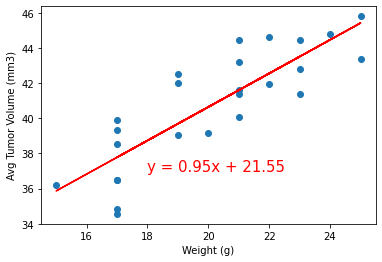

In [18]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(scatter_regimen['Weight (g)'],scatter_regimen['Tumor Volume (mm3)'])
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

x_values = scatter_regimen['Weight (g)']
y_values = scatter_regimen['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()